# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=['date'])

In [3]:
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=['date'])

In [4]:
df = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=['date'])

In [5]:
df_test.shape[0], df_train.shape[0]

(5856, 16860)

Изучим каждый датафрейм

In [6]:
df_train.info()
# Как видно - многие столбцы имеют пропуски
# необходимо поменять тип данных для даты

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

In [7]:
df_train.describe()
# Судя по такому разбросу, можно предположить, что в дальнейшем нужно масштабирование признаков

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [8]:
df_train.head()
# К каждому значению привязана определенная дата, это может помочь убрать пропуски

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
df_test.info()
# Значительно меньше столбцов - отсутствуют параметры значения продуктов и расчетные характеристики.
# Во многих колонках имеются пропуски

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                    

In [10]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [11]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

In [13]:
df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [14]:
df.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Проверка расчета эффективности обогащения

In [15]:
#Напишем функцию, с помощью которой можно рассчитать эффективность
def recovery(c, f, t):
    recovery = (c*(f-t))/(f*(c-t)) * 100
    recovery = recovery.fillna(0.0)
    recovery = recovery.replace([np.inf, -np.inf], 0.0)
    return recovery

In [16]:
df_recovery_recalculated = df_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]

In [17]:
df_recovery_recalculated['rougher.output.recovery_recalculated'] = recovery(
    df_recovery_recalculated['rougher.output.concentrate_au'], 
    df_recovery_recalculated['rougher.input.feed_au'], 
    df_recovery_recalculated['rougher.output.tail_au'])

In [18]:
df_recovery_recalculated

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,rougher.output.recovery_recalculated
date,,,,,
2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763,87.107763
2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261,86.843261
2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308,86.842308
2016-01-15 03:00:00,19.320810,6.118189,1.079755,87.226430,87.226430
2016-01-15 04:00:00,19.216101,5.663707,1.012642,86.688794,86.688794
...,...,...,...,...,...
2018-08-18 06:59:59,18.603550,5.335862,0.748633,89.574376,89.574376
2018-08-18 07:59:59,18.441436,4.838619,0.771582,87.724007,87.724007
2018-08-18 08:59:59,15.111231,4.525061,0.685059,88.890579,88.890579


In [19]:
# Проверим наличие есть ли пропуски в данных 
print(df_recovery_recalculated['rougher.output.recovery_recalculated'].isna().sum())
print(df_recovery_recalculated['rougher.output.recovery'].isna().sum())
print(np.isfinite(df_recovery_recalculated['rougher.output.recovery_recalculated']).all())
print(np.all(np.isfinite(df_recovery_recalculated['rougher.output.recovery'])))
print(df_recovery_recalculated[
    df_recovery_recalculated['rougher.output.recovery_recalculated'] == np.inf]['rougher.output.recovery_recalculated'])

0
2573
True
False
Series([], Name: rougher.output.recovery_recalculated, dtype: float64)


In [20]:
# Сделаем срез данных, где значения rougher.output.recovery больше 0
df_recovery_recalculated = df_recovery_recalculated[df_recovery_recalculated['rougher.output.recovery'] > 0]

In [21]:
# Посчитаем среднее абсолютное отклонение 
mean_absolute_error(df_recovery_recalculated['rougher.output.recovery_recalculated'], df_recovery_recalculated['rougher.output.recovery'])
# Как видно, величина эффективности обогащения была посчитана верна 

9.661285240080234e-15

Предобработка данных

In [22]:
# Тестовая выборка имеет большое количество пропусков, поэтому одним из решений задачи
# может быть создание новых датафреймов на основе выборки, которая содержит как данные для теста, так и данные для обучения 
# модели
# Однако и в новых выборках много пропусков и с ними необходимо что-то сделать
# Есть несколько вариантов - замена пропусков на медианы и среднее, замена на заглушки(а затем сделать срез данных)
# и дропнуть данные, где есть пропуски
df_new = df.dropna(axis=0)
df_train_new, df_test_new  =  train_test_split(df_new, test_size=0.34, random_state=12345)
df_train_new.shape[0], df_test_new.shape[0]

(10622, 5472)

In [23]:
df_test_new.info()
# произошла потеря около 20% данных, что не есть хорошо
# однако замена данных на другие значения могут сильно повлиять на модель, так как многие данные взаимосвязаны друг с другом

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 2017-01-26 02:59:59 to 2016-10-24 21:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           5472 non-null float64
final.output.concentrate_pb                           5472 non-null float64
final.output.concentrate_sol                          5472 non-null float64
final.output.concentrate_au                           5472 non-null float64
final.output.recovery                                 5472 non-null float64
final.output.tail_ag                                  5472 non-null float64
final.output.tail_pb                                  5472 non-null float64
final.output.tail_sol                                 5472 non-null float64
final.output.tail_au                                  5472 non-null float64
primary_cleaner.input.sulfate                         5472 non-null float64
primary_cleaner.input.depressant                      5472 non-null float64
primary_cleaner.input

In [24]:
df_train_new.info()
# Произошла потеря уже 30% данных, что с этим сделать - смириться или тут все-таки реальна адекватная замена?

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10622 entries, 2017-04-16 16:59:59 to 2016-09-19 04:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           10622 non-null float64
final.output.concentrate_pb                           10622 non-null float64
final.output.concentrate_sol                          10622 non-null float64
final.output.concentrate_au                           10622 non-null float64
final.output.recovery                                 10622 non-null float64
final.output.tail_ag                                  10622 non-null float64
final.output.tail_pb                                  10622 non-null float64
final.output.tail_sol                                 10622 non-null float64
final.output.tail_au                                  10622 non-null float64
primary_cleaner.input.sulfate                         10622 non-null float64
primary_cleaner.input.depressant                      10622 non-null float64
primary_c

### Вывод

<ul> На данном этапе были изучены данные: было выявлено, что тестовая выборка дана не в полном объеме (многие столбцы отсутствовали), поэтому было принято решение создать новые выборки на основе исходного датафрейма. </ul>
<ul> Была проведена проверка расчета эффективности обогащения. По итогам этой проверки можно сказать, что расчет был проведен безошибочно. </ul> 

# 2. Анализ данных

Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

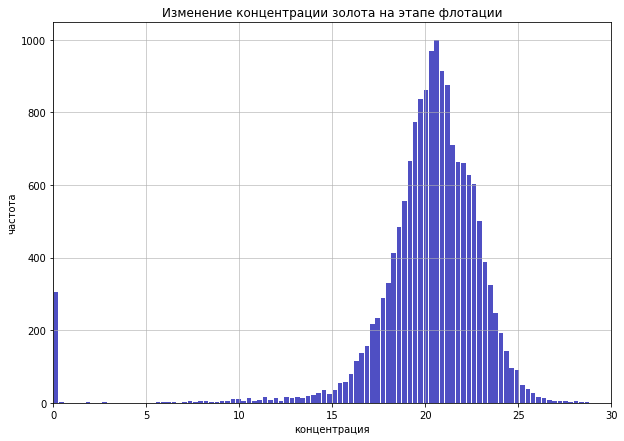

In [25]:
# Напишем функцию, которая будет строить гистограммы
def hist(df, column, xlabel, ylabel, title, bins, x1, x2):
    plt.rcParams["figure.figsize"] = (10, 7)
    plt.hist(x=df[column], bins= bins, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(alpha=0.75)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x1, x2)
    plt.title(title)
hist(df_new, 'rougher.output.concentrate_au', 'концентрация', 'частота', 'Изменение концентрации золота на этапе флотации', 100, 0, 30)

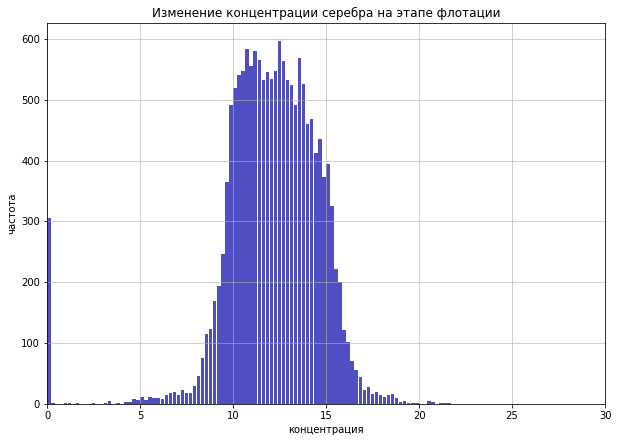

In [26]:
hist(df_new, 'rougher.output.concentrate_ag', 'концентрация', 'частота', 'Изменение концентрации серебра на этапе флотации', 100, 0, 30)

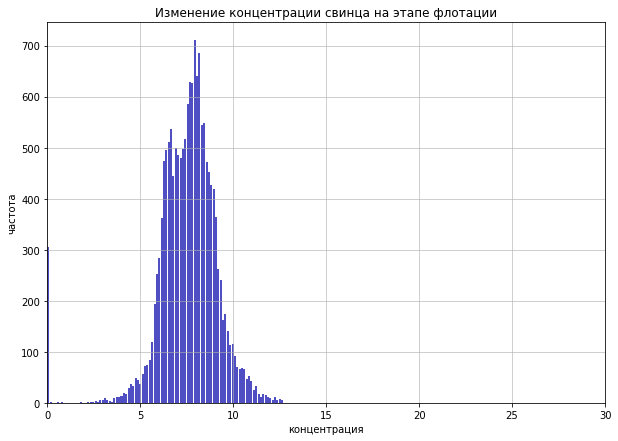

In [27]:
hist(df_new, 'rougher.output.concentrate_pb', 'концентрация', 'частота', 'Изменение концентрации свинца на этапе флотации', 100, 0, 30)

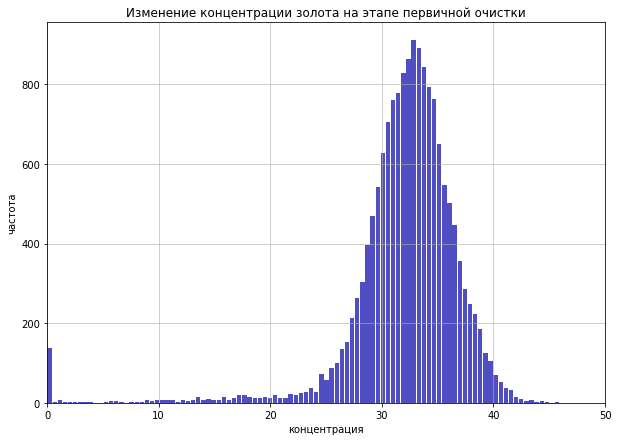

In [28]:
# Для первичной очистки
hist(df_new, 'primary_cleaner.output.concentrate_au', 'концентрация', 'частота', 'Изменение концентрации золота на этапе первичной очистки', 100, 0, 50)

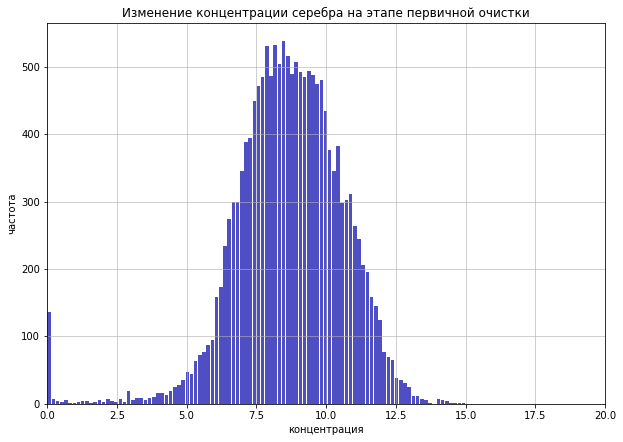

In [29]:
hist(df_new, 'primary_cleaner.output.concentrate_ag', 'концентрация', 'частота', 'Изменение концентрации серебра на этапе первичной очистки', 100, 0, 20)

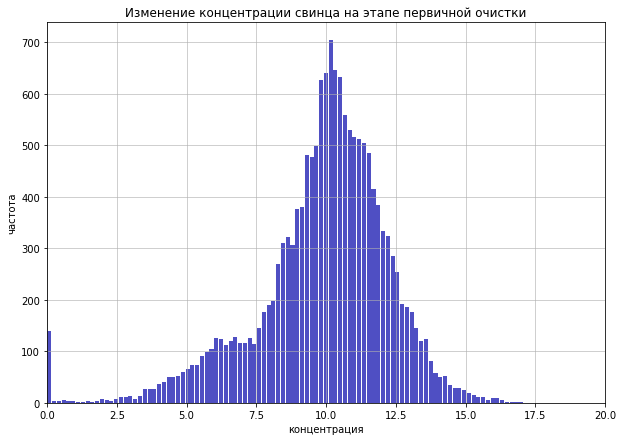

In [30]:
hist(df_new, 'primary_cleaner.output.concentrate_pb', 'концентрация', 'частота', 'Изменение концентрации cвинца на этапе первичной очистки', 100, 0, 20)

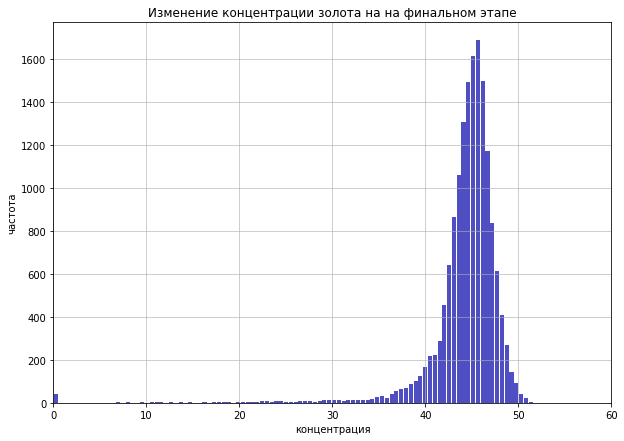

In [31]:
# Финальные характеристики
hist(df_new, 'final.output.concentrate_au', 'концентрация', 'частота', 'Изменение концентрации золота на на финальном этапе', 100, 0, 60)

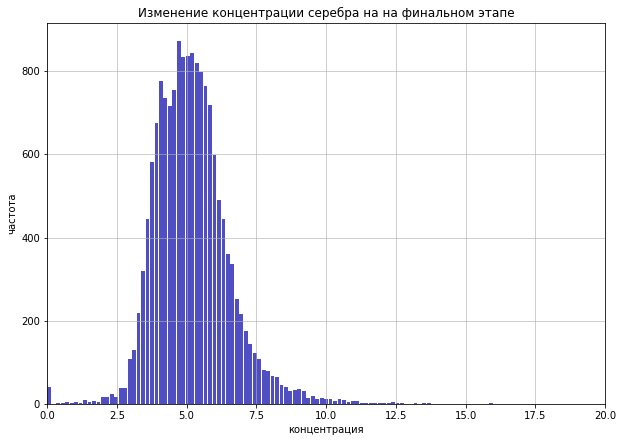

In [32]:
hist(df_new, 'final.output.concentrate_ag', 'концентрация', 'частота', 'Изменение концентрации серебра на на финальном этапе', 100, 0, 20)

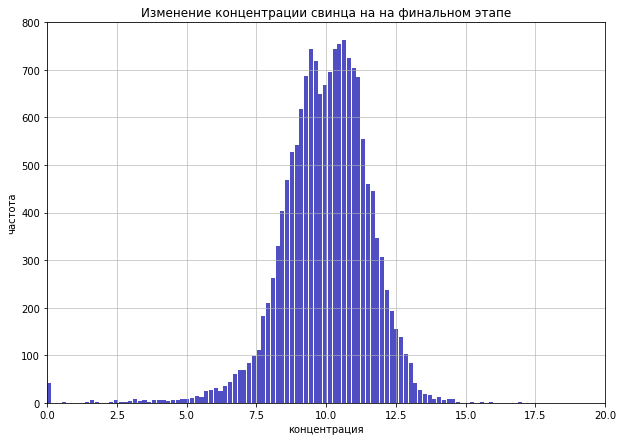

In [33]:
hist(df_new, 'final.output.concentrate_pb', 'концентрация', 'частота', 'Изменение концентрации свинца на на финальном этапе', 100, 0, 20)

### Вывод

С каждым последующим этапом очистки происходит рост концентрации золота, при этом падение концентраций серебра и свинца, что в принципе и требуется от данного технологического процесса. 

Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

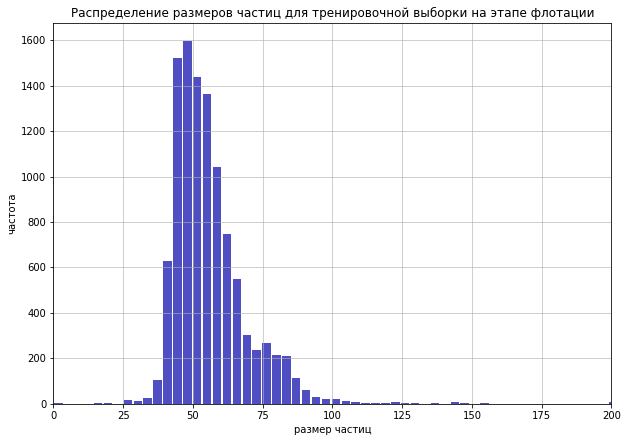

In [34]:
# Размеры гранул известны только на этапах флотации и первичной очистки
# В начале сравним распределение для этапа флотации
hist(df_train_new, 'rougher.input.feed_size', 'размер частиц', 'частота', 'Распределение размеров частиц для тренировочной выборки на этапе флотации', 100, 0, 200)

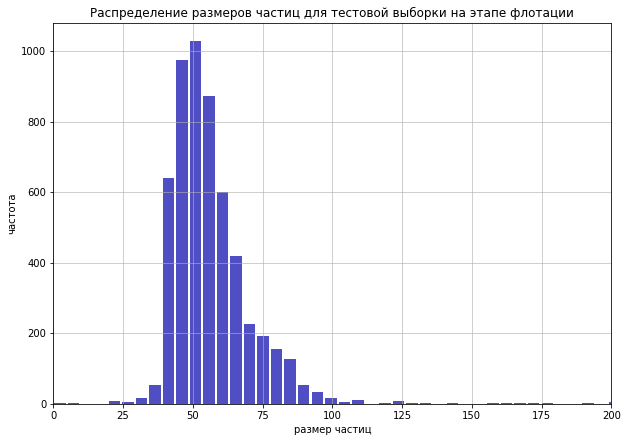

In [35]:
hist(df_test_new, 'rougher.input.feed_size','размер частиц', 'частота', 'Распределение размеров частиц для тестовой выборки на этапе флотации', 100, 0, 200)

Как видно - (нормальное) распределение носит одинаковый характер. 

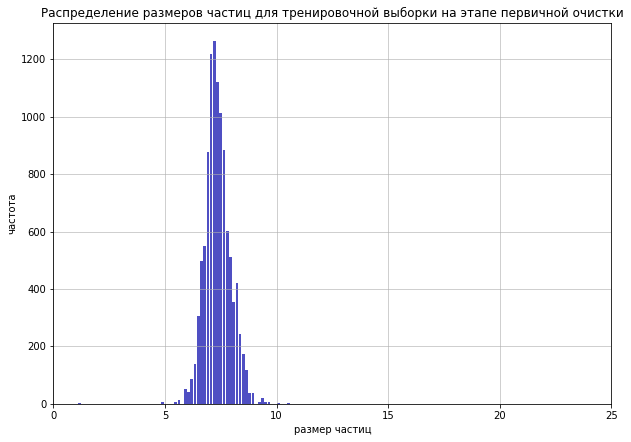

In [36]:
# Для этапа первичной очистки
hist(df_train_new, 'primary_cleaner.input.feed_size', 'размер частиц', 'частота', 'Распределение размеров частиц для тренировочной выборки на этапе первичной очистки', 100, 0, 25)

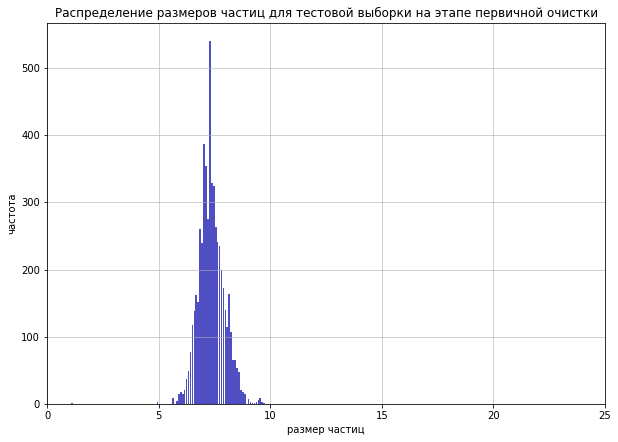

In [37]:
hist(df_test_new, 'primary_cleaner.input.feed_size', 'размер частиц', 'частота', 'Распределение размеров частиц для тестовой выборки на этапе первичной очистки', 100, 0, 25)

Распределения носят одинаковый характер.

### Вывод

Распределения не имеют сильных отличий, поэтому фактор отличия распределений, вероятно, не будет влиять на оценку модели.

Исследование суммарных концентраций всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

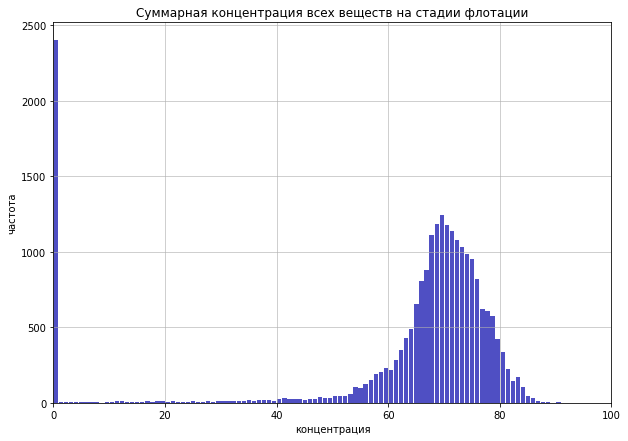

In [38]:
# Рассмотрим этап флотации
df_sum_conc_for_rougher = df[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au','rougher.output.concentrate_sol']]
df_sum_conc_for_rougher['rougher.output.concentrate_sum'] = df_sum_conc_for_rougher['rougher.output.concentrate_ag'] + df_sum_conc_for_rougher['rougher.output.concentrate_pb'] + df_sum_conc_for_rougher['rougher.output.concentrate_au'] + df_sum_conc_for_rougher['rougher.output.concentrate_sol']
hist(df_sum_conc_for_rougher, 'rougher.output.concentrate_sum', 'концентрация', 'частота', 'Cуммарная концентрация всех веществ на стадии флотации', 100, 0, 100)
# Видно, что довольно много значений, равных 0. Вероятно, что это аномалия.

In [39]:
# Проверим распределение
df_sum_conc_for_rougher['rougher.output.concentrate_sum'].value_counts()
# Довольно много значений, равных 0.04. Вероятно, что такое событие возможно - сырье содержит малое количество перечисленных металлов.

0.000000     1953
0.040000      439
65.748985      11
41.115844      11
67.824055       6
             ... 
75.610931       1
69.662742       1
66.389557       1
69.965644       1
73.245861       1
Name: rougher.output.concentrate_sum, Length: 20096, dtype: int64

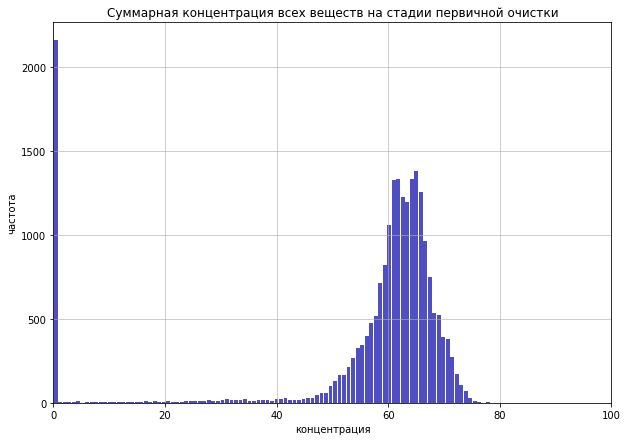

In [40]:
# Для первичной очистки
df_sum_conc_for_primary_cleaner = df[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_sol']]
df_sum_conc_for_primary_cleaner['primary_cleaner.output.concentrate_sum'] = df_sum_conc_for_primary_cleaner['primary_cleaner.output.concentrate_ag'] + df_sum_conc_for_primary_cleaner['primary_cleaner.output.concentrate_pb'] + df_sum_conc_for_primary_cleaner['primary_cleaner.output.concentrate_au'] + df_sum_conc_for_primary_cleaner['primary_cleaner.output.concentrate_sol']
hist(df_sum_conc_for_primary_cleaner, 'primary_cleaner.output.concentrate_sum', 'концентрация', 'частота', 'Cуммарная концентрация всех веществ на стадии первичной очистки', 100, 0, 100)
# Похожая ситуации как и для этапа флотации

In [41]:
df_sum_conc_for_primary_cleaner['primary_cleaner.output.concentrate_sum'].value_counts()
# Аналогично этапу флотации

0.000000     1626
0.040000      523
62.032338       6
63.823562       5
59.095131       5
             ... 
63.026444       1
60.485113       1
61.431143       1
66.540216       1
66.642414       1
Name: primary_cleaner.output.concentrate_sum, Length: 19751, dtype: int64

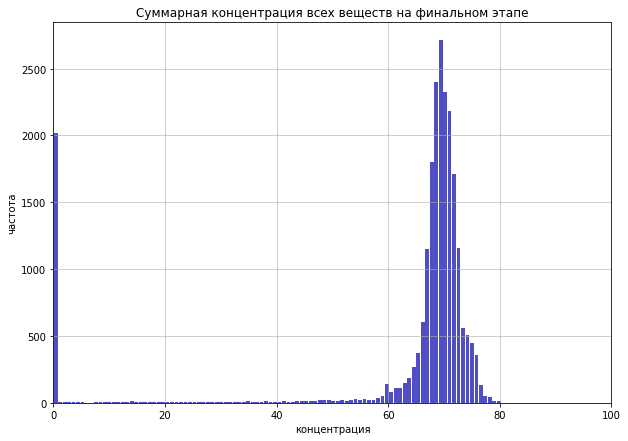

In [42]:
# Финальные характеристики
df_sum_conc_for_final = df[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au','final.output.concentrate_sol']]
df_sum_conc_for_final['final.output.concentrate_sum'] = df_sum_conc_for_final['final.output.concentrate_ag'] + df_sum_conc_for_final['final.output.concentrate_pb'] + df_sum_conc_for_final['final.output.concentrate_au'] + df_sum_conc_for_final['final.output.concentrate_sol']
hist(df_sum_conc_for_final, 'final.output.concentrate_sum', 'концентрация', 'частота', 'Cуммарная концентрация всех веществ на финальном этапе', 100, 0, 100)

In [43]:
df_sum_conc_for_final['final.output.concentrate_sum'].value_counts()
# Аналогичная ситуация как и для флотации, и первичной очистки.

0.000000     1613
0.040000      398
60.141117      83
64.816783      19
64.690452      11
             ... 
75.351862       1
66.932207       1
68.875007       1
72.073155       1
64.004667       1
Name: final.output.concentrate_sum, Length: 20181, dtype: int64

In [44]:
df_train_new = df_train_new[(df_train_new['rougher.output.concentrate_ag'] >0) & (df_train_new['rougher.output.concentrate_pb'] >0) & (df_train_new['rougher.output.concentrate_au'] >0) & (df_train_new['rougher.output.concentrate_sol'] >0)]
df_train_new = df_train_new[(df_train_new['final.output.concentrate_ag'] > 0) & (df_train_new['final.output.concentrate_pb'] > 0) & (df_train_new['final.output.concentrate_au'] > 0) & (df_train_new['final.output.concentrate_sol'] > 0)]
df_test_new = df_test_new[(df_test_new['rougher.output.concentrate_ag'] >0) & (df_test_new['rougher.output.concentrate_pb'] >0) & (df_test_new['rougher.output.concentrate_au'] >0) & (df_test_new['rougher.output.concentrate_sol'] >0)]
df_test_new = df_test_new[(df_test_new['final.output.concentrate_ag'] > 0) & (df_test_new['final.output.concentrate_pb'] > 0) & (df_test_new['final.output.concentrate_au'] > 0) & (df_test_new['final.output.concentrate_sol'] > 0)]

### Вывод

Исходя из распределений, можно сделать вывод, что аномальным значением может быть суммарная концентрация, равная 0. Возможно, такое возможно в реальности, однако было принято решение исключить эти данные из выборки. В реальности - необходимо уточнить эту информацию у заказчика.

# 3. Модель

Функция для вычисления итоговой sMAPE.

In [45]:
def symmetric_mean_absolute_percentage_error(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final): 
    return 0.25*(100/len(df_new) * np.sum(2 * np.abs(y_true_rougher - y_pred_rougher) / (np.abs(y_true_rougher) + np.abs(y_pred_rougher)))) + 0.75*(100/len(df_new) * np.sum(2 * np.abs(y_true_final - y_pred_final) / (np.abs(y_true_final) + np.abs(y_pred_final))))

Модели

In [46]:
df_train_new['rougher.output.recovery'] = df_train_new['rougher.output.recovery'].astype('int')
df_test_new['rougher.output.recovery'] = df_test_new['rougher.output.recovery'].astype('int')
features_train_rougher = df_train_new.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = df_train_new['rougher.output.recovery']
features_test_rougher = df_test_new.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = df_test_new['rougher.output.recovery']
df_train_new['final.output.recovery'] = df_train_new['final.output.recovery'].astype('int')
df_test_new['final.output.recovery'] = df_test_new['final.output.recovery'].astype('int')
features_train_final = df_train_new.drop(['final.output.recovery'], axis=1)
target_train_final = df_train_new['final.output.recovery']
features_test_final = df_test_new.drop(['final.output.recovery'], axis=1)
target_test_final = df_test_new['final.output.recovery']

In [47]:
# Начнем с дерева решений
model_decision_tree_rougher = DecisionTreeRegressor(random_state=12345)
cross_val_score_rougher = cross_val_score(model_decision_tree_rougher, features_train_rougher, target_train_rougher, cv=5)
final_score_rougher = cross_val_score_rougher.sum() / cross_val_score_rougher.shape[0]
print('Средняя оценка качества модели:', final_score_rougher)
model_decision_tree_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_decision_tree_rougher.predict(features_test_rougher)

Средняя оценка качества модели: 0.9032037212391433


In [48]:
model_decision_tree_final = DecisionTreeRegressor(random_state=12345)
cross_val_score_final = cross_val_score(model_decision_tree_final, features_train_final, target_train_final, cv=5)
final_score_final = cross_val_score_final.sum() / cross_val_score_final.shape[0]
print('Средняя оценка качества модели:', final_score_final)
model_decision_tree_final.fit(features_train_final, target_train_final)
predicted_final = model_decision_tree_final.predict(features_test_final)

Средняя оценка качества модели: 0.8538619563781185


In [49]:
print('Итоговое sMAPE для дерева решений:', 
      symmetric_mean_absolute_percentage_error(target_test_rougher, predicted_rougher, 
                                               target_test_final, predicted_final))

Итоговое sMAPE для дерева решений: 0.6725909785479723


Линейная регрессия

In [50]:
model_logistic_rougher = LinearRegression()
cross_val_score_rougher = cross_val_score(model_logistic_rougher, features_train_rougher, target_train_rougher, cv=5)
final_score_rougher = cross_val_score_rougher.sum() / cross_val_score_rougher.shape[0]
print('Средняя оценка качества модели:', final_score_rougher)
model_logistic_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_logistic_rougher.predict(features_test_rougher)

Средняя оценка качества модели: 0.9309013098072446


In [51]:
model_logistic_final = LinearRegression()
cross_val_score_final = cross_val_score(model_logistic_final, features_train_final, target_train_final, cv=5)
final_score_final = cross_val_score_final.sum() / cross_val_score_final.shape[0]
print('Средняя оценка качества модели:', final_score_final)
model_logistic_final.fit(features_train_final, target_train_final)
predicted_rougher = model_logistic_final.predict(features_test_final)

Средняя оценка качества модели: 0.945941944678613


In [52]:
print('Итоговое sMAPE для линейной регрессии:', 
      symmetric_mean_absolute_percentage_error(target_test_rougher, predicted_rougher, 
                                               target_test_final, predicted_final))

Итоговое sMAPE для линейной регрессии: 2.5145179776668187


Случайный лес

In [53]:
model_random_forest_rougher = RandomForestRegressor(random_state=12345)
cross_val_score_rougher = cross_val_score(model_random_forest_rougher, features_train_rougher, target_train_rougher, cv=5)
final_score_rougher = cross_val_score_rougher.sum() / cross_val_score_rougher.shape[0]
print('Средняя оценка качества модели:', final_score_rougher)
model_random_forest_rougher.fit(features_train_rougher, target_train_rougher)
predicted_rougher = model_random_forest_rougher.predict(features_test_rougher)

Средняя оценка качества модели: 0.946704655477023


In [54]:
model_random_forest_final = RandomForestRegressor(random_state=12345)
cross_val_score_final = cross_val_score(model_random_forest_final, features_train_final, target_train_final, cv=5)
final_score_final = cross_val_score_final.sum() / cross_val_score_final.shape[0]
print('Средняя оценка качества модели:', final_score_final)
model_random_forest_final.fit(features_train_final, target_train_final)
predicted_final = model_random_forest_final.predict(features_test_final)

Средняя оценка качества модели: 0.9287806540405883


In [55]:
print('Итоговое sMAPE для случайного леса:', 
      symmetric_mean_absolute_percentage_error(target_test_rougher, predicted_rougher, 
                                               target_test_final, predicted_final))

Итоговое sMAPE для случайного леса: 0.4622049513045415


### Вывод

Наилучшей средней оценкой качества модели обладает модель случайного леса. По результатам предсказаний было посчитано итоговое sMAPE и для наилучшей модели это значение оказалось равным 0.462.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке